<a href="https://colab.research.google.com/github/laresamdeola/Research/blob/main/NLP_Malware_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [409]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

In [410]:
data = pd.read_csv('malicious_phish.csv')

In [411]:
len(data)

651191

In [412]:
data

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [413]:
phishing_sites = data.iloc[:, 0].values
attack_type = data.iloc[:, -1].values

In [414]:
print(phishing_sites[0:10])

['br-icloud.com.br' 'mp3raid.com/music/krizz_kaliko.html'
 'bopsecrets.org/rexroth/cr/1.htm'
 'http://www.garage-pirenne.be/index.php?option=com_content&view=article&id=70&vsig70_0=15'
 'http://adventure-nicaragua.net/index.php?option=com_mailto&tmpl=component&link=aHR0cDovL2FkdmVudHVyZS1uaWNhcmFndWEubmV0L2luZGV4LnBocD9vcHRpb249Y29tX2NvbnRlbnQmdmlldz1hcnRpY2xlJmlkPTQ3OmFib3V0JmNhdGlkPTM2OmRlbW8tYXJ0aWNsZXMmSXRlbWlkPTU0'
 'http://buzzfil.net/m/show-art/ils-etaient-loin-de-s-imaginer-que-le-hibou-allait-faire-ceci-quand-ils-filmaient-2.html'
 'espn.go.com/nba/player/_/id/3457/brandon-rush'
 'yourbittorrent.com/?q=anthony-hamilton-soulife'
 'http://www.pashminaonline.com/pure-pashminas'
 'allmusic.com/album/crazy-from-the-heat-r16990']


In [415]:
phishing = data[data.loc[:, 'type'] == 'phishing']
benign = data[(data.loc[:, 'type'] == 'benign') | (data.loc[:, 'type'] == 'benig')]
defacement = data[data.loc[:, 'type'] == 'defacement']
malware = data[data.loc[:, 'type'] == 'malware']

In [416]:
phishing = phishing['url']
benign = benign['url']
defacement = defacement['url']
malware = malware['url']

In [417]:
print(phishing)

0                                          br-icloud.com.br
21               signin.eby.de.zukruygxctzmmqi.civpro.co.za
28        http://www.marketingbyinternet.com/mo/e56508df...
40        https://docs.google.com/spreadsheet/viewform?f...
72                                     retajconsultancy.com
                                ...                        
651186              xbox360.ign.com/objects/850/850402.html
651187         games.teamxbox.com/xbox-360/1860/Dead-Space/
651188           www.gamespot.com/xbox360/action/deadspace/
651189        en.wikipedia.org/wiki/Dead_Space_(video_game)
651190            www.angelfire.com/goth/devilmaycrytonite/
Name: url, Length: 94111, dtype: object


In [418]:
# Need to do this first

print(defacement)

3         http://www.garage-pirenne.be/index.php?option=...
4         http://adventure-nicaragua.net/index.php?optio...
8              http://www.pashminaonline.com/pure-pashminas
11        http://www.ikenmijnkunst.nl/index.php/expositi...
13        http://www.lebensmittel-ueberwachung.de/index....
                                ...                        
520294    http://blueanchor.nl/dintelmarkt/page/show_cat...
520302                  http://www.hafenrocker.de/index.php
520305    http://www.kulgupuit.ee/index.php?option=com_p...
520308     http://www.nhomkinhdep.com/tu-bep-nhom-kinh.html
520325    http://www.capella.nl/nl.html?view=article&cat...
Name: url, Length: 96457, dtype: object


In [419]:
print(len(phishing), len(benign), len(defacement), len(malware))

94111 428103 96457 32520


In [420]:
len(phishing_sites)

651191

In [421]:
len(attack_type)

651191

Transforming the Dataframe

In [422]:
# Have to turn the Dataframe to a numpy array then reshape this array to have one dimension. This is because
# the FreqDist class is expecting a numpy array/list with one dimension

phishing = phishing.to_numpy().reshape(-1)
malware = malware.to_numpy().reshape(-1)
benign = benign.to_numpy().reshape(-1)
defacement = defacement.to_numpy().reshape(-1)

In [423]:
print(defacement)

['http://www.garage-pirenne.be/index.php?option=com_content&view=article&id=70&vsig70_0=15'
 'http://adventure-nicaragua.net/index.php?option=com_mailto&tmpl=component&link=aHR0cDovL2FkdmVudHVyZS1uaWNhcmFndWEubmV0L2luZGV4LnBocD9vcHRpb249Y29tX2NvbnRlbnQmdmlldz1hcnRpY2xlJmlkPTQ3OmFib3V0JmNhdGlkPTM2OmRlbW8tYXJ0aWNsZXMmSXRlbWlkPTU0'
 'http://www.pashminaonline.com/pure-pashminas' ...
 'http://www.kulgupuit.ee/index.php?option=com_phocagallery&view=detail&catid=2:foto&id=28:adver-2&tmpl=component&Itemid=5&lang=et'
 'http://www.nhomkinhdep.com/tu-bep-nhom-kinh.html'
 'http://www.capella.nl/nl.html?view=article&catid=25:capella&id=75:capellaprogrammas&tmpl=component&print=1&page=']


In [424]:
print(type(phishing))

<class 'numpy.ndarray'>


In [425]:
print(type(phishing), type(phishing_sites))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [426]:
pd.unique(attack_type)

array(['phishing', 'benign', 'defacement', 'malware'], dtype=object)

In [427]:
pd.value_counts(attack_type)

benign        428103
defacement     96457
phishing       94111
malware        32520
dtype: int64

In [428]:
'''
benign = 165966
defacement = 41934
phishing = 13595
malware = 5431
'''

'\nbenign = 165966\ndefacement = 41934\nphishing = 13595\nmalware = 5431\n'

In [429]:
# Extract the frequency distributions of each sub-class individually then of the whole data also
# From this frequency distributing, get the most frequent words
# draw the graph of the most frequent words
# draw the word clouds of the individual sub-classes
# draw the roc-curve

# Further Research, create a stop words dictionary for website links

In [430]:
from nltk import FreqDist

In [431]:
freq_dist_all = FreqDist(phishing_sites)
print(freq_dist_all)

<FreqDist with 641119 samples and 651191 outcomes>


In [432]:
freq_phishing = FreqDist(phishing)
freq_phishing.most_common(10)
#print(freq_phishing)
#freq_phishing.plot(10, cumulative=True)

[('http://www.naylorantiques.com/EuDbESJbAubgP-elznH_j-AbkTI_TA', 3),
 ('http://www.naylorantiques.com/htwtSL-GeZ-klr.--valhCPT', 2),
 ('http://www.naylorantiques.com/patrimonio/58', 2),
 ('http://www.naylorantiques.com/AtualizacaoSegura/pictures/2242', 2),
 ('http://www.gkjx168.com/images/?ref=http://uqpzemuus.battle.net/d3/en/index',
  2),
 ('http://www.jjscdc.cn/adfile/login.html', 2),
 ('http://www.habbocreditosparati.blogspot.com/', 2),
 ('http://www.jjscdc.cn/adfile/login.html?http://us.battle.net/login/en/?ref=http://us.battle.net/d3/en/index&amp;app=com-d3',
  2),
 ('http://www.jjscdc.cn/adfile/login.html?http://us.battle.net/login/en/?ref=http://us.battle.net/d3/en/index',
  2),
 ('http://www.naylorantiques.com/CustomerWeb/pages/24', 2)]

In [433]:
freq_benign = FreqDist(benign)
#print(freq_dist_phishing)
freq_benign.most_common(10)
#freq_benign.plot(10, cumulative=True)

[('psychology.concordia.ca/', 2),
 ('umkc.edu/history/', 2),
 ('hobbyfever.com/', 2),
 ('stubhub.com/kansas-city-royals-tickets/', 2),
 ('sites.google.com/a/connectory.org/world-connectory-project/list-of-partnerships-for-global-south',
  2),
 ('insidervlv.com/Odds/PreviousStanleyCups.html', 2),
 ('lhs-sfusd-ca.schoolloop.com/', 2),
 ('tricity.wsu.edu/', 2),
 ('soul-patrol.com/', 2),
 ('oaklandnet.com/', 2)]

In [434]:
freq_malware = FreqDist(malware)
freq_malware.most_common(10)
#print(freq_dist_phishing)
#freq_malware.most_common(20)
#freq_malware.plot(10, cumulative=True)

[('http://style.org.hc360.com/css/detail/mysite/siteconfig/pro_control.css',
  180),
 ('http://www.pubyun.com/wiki/lib/exe/css.php?t=dokuwiki&tseed=f1f16e8c6142fab8553f2b9cfe045961',
  146),
 ('http://9779.info/%E6%A0%91%E5%8F%B6%E8%B4%B4%E7%94%BB%E4%BD%9C%E5%93%81/',
  91),
 ('http://9779.info/%E6%A0%91%E5%8F%B6%E7%B2%98%E8%B4%B4%E7%94%BB/', 88),
 ('http://www.js182.com/app/member/SportOption.php?uid=guest&langx=gb', 79),
 ('http://www.711100.com/app/member/SportOption.php?uid=guest&langx=gb', 72),
 ('http://www.824555.com/app/member/SportOption.php?uid=guest&langx=gb', 71),
 ('http://pjhku.com/plugin.php?id=levsign&m=2&fh=6848d1f0&hook=1&mobile=no',
  70),
 ('http://9779.info/%E8%A1%8D%E7%BA%B8%E8%B4%B4%E7%94%BB%E5%9B%BE%E7%89%87%E6%AC%A3%E8%B5%8F/',
  69),
 ('http://9779.info/%E5%B0%8F%E7%8F%AD%E5%B9%BC%E5%84%BF%E5%89%AA%E7%BA%B8%E8%B4%B4%E7%94%BB/',
  63)]

In [435]:
freq_defacement = FreqDist(defacement)
freq_defacement.most_common(10)
#print(freq_dist_phishing)
#freq_defacement.plot(10, cumulative=True)

[('http://www.centercamping.com.br/index.php?option=com_ckforms&task=captcha&sid=c4ce9d9bffcf8ba3357da92fd49c2457',
  3),
 ('http://www.bruynzeelmultipanel.be/index.php?option=com_content&view=article&id=20&Itemid=21',
  3),
 ('http://www.bruynzeelmultipanel.be/index.php?option=com_artforms&formid=1&Itemid=99999',
  3),
 ('http://www.zibae.ir/index.php?option=com_mailto&tmpl=component&link=aHR0cDovL3d3dy56aWJhZS5pci9pbmRleC5waHA%2Fb3B0aW9uPWNvbV9jb250ZW50JnZpZXc9YXJ0aWNsZSZpZD02NTM6MTM5MS0xMS0wOC0wOC00OC0yNyZjYXRpZD0xMjoxMzg5LTA5LTI5LTA3LTQzLTMw',
  3),
 ('http://www.ninopizzaria.com.br/index.php?option=com_content&view=category&id=43&Itemid=63',
  3),
 ('http://www.bruynzeelmultipanel.be/index.php?option=com_content&view=article&id=7&Itemid=8',
  3),
 ('http://www.allaroundrental.com/index.php?page=shop.product_details&flypage=flypage.pbv.v1.tpl&product_id=387&category_id=33&option=com_virtuemart&Itemid=69',
  3),
 ('http://www.holidayclub-mtb.com/holiday/index.php?option=com_content&

In [436]:
print(phishing.ndim)

1


In [437]:
freq_dist_all.most_common(10)

[('http://style.org.hc360.com/css/detail/mysite/siteconfig/pro_control.css',
  180),
 ('http://www.pubyun.com/wiki/lib/exe/css.php?t=dokuwiki&tseed=f1f16e8c6142fab8553f2b9cfe045961',
  146),
 ('http://9779.info/%E6%A0%91%E5%8F%B6%E8%B4%B4%E7%94%BB%E4%BD%9C%E5%93%81/',
  91),
 ('http://9779.info/%E6%A0%91%E5%8F%B6%E7%B2%98%E8%B4%B4%E7%94%BB/', 88),
 ('http://www.js182.com/app/member/SportOption.php?uid=guest&langx=gb', 79),
 ('http://www.711100.com/app/member/SportOption.php?uid=guest&langx=gb', 72),
 ('http://www.824555.com/app/member/SportOption.php?uid=guest&langx=gb', 71),
 ('http://pjhku.com/plugin.php?id=levsign&m=2&fh=6848d1f0&hook=1&mobile=no',
  70),
 ('http://9779.info/%E8%A1%8D%E7%BA%B8%E8%B4%B4%E7%94%BB%E5%9B%BE%E7%89%87%E6%AC%A3%E8%B5%8F/',
  69),
 ('http://9779.info/%E5%B0%8F%E7%8F%AD%E5%B9%BC%E5%84%BF%E5%89%AA%E7%BA%B8%E8%B4%B4%E7%94%BB/',
  63)]

In [438]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [439]:
data_types = [phishing, malware, defacement, benign]

# Method to print out the type of a variable.

def check_type(data):
  if isinstance(data, list):
    for i in data_types:
      print(type(i))
  else:
    print(type(data))

check_type(data_types)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [440]:
phishing_as_string = np.array_str(phishing)
malware_as_string = np.array_str(malware)
defacement_as_string = np.array_str(defacement)

In [441]:
phishing_as_string

"['br-icloud.com.br' 'signin.eby.de.zukruygxctzmmqi.civpro.co.za'\n 'http://www.marketingbyinternet.com/mo/e56508df639f6ce7d55c81ee3fcd5ba8/'\n ... 'www.gamespot.com/xbox360/action/deadspace/'\n 'en.wikipedia.org/wiki/Dead_Space_(video_game)'\n 'www.angelfire.com/goth/devilmaycrytonite/']"

In [442]:
phishing

array(['br-icloud.com.br', 'signin.eby.de.zukruygxctzmmqi.civpro.co.za',
       'http://www.marketingbyinternet.com/mo/e56508df639f6ce7d55c81ee3fcd5ba8/',
       ..., 'www.gamespot.com/xbox360/action/deadspace/',
       'en.wikipedia.org/wiki/Dead_Space_(video_game)',
       'www.angelfire.com/goth/devilmaycrytonite/'], dtype=object)

In [443]:
check_type(defacement_as_string)

<class 'str'>


In [444]:
from wordcloud import WordCloud, STOPWORDS

In [445]:
print(phishing)

['br-icloud.com.br' 'signin.eby.de.zukruygxctzmmqi.civpro.co.za'
 'http://www.marketingbyinternet.com/mo/e56508df639f6ce7d55c81ee3fcd5ba8/'
 ... 'www.gamespot.com/xbox360/action/deadspace/'
 'en.wikipedia.org/wiki/Dead_Space_(video_game)'
 'www.angelfire.com/goth/devilmaycrytonite/']


In [446]:
phishing_tokens = [nltk.tokenize.sent_tokenize(word) for word in phishing]

In [447]:
malware_tokens = [nltk.tokenize.sent_tokenize(word) for word in malware]

In [448]:
defacement_tokens = [nltk.tokenize.sent_tokenize(word) for word in defacement]

In [449]:
benign_tokens = [nltk.tokenize.sent_tokenize(word) for word in benign]

In [450]:
print(malware_tokens[:10])

[['http://www.824555.com/app/member/SportOption.php?uid=guest&langx=gb'], ['http://9779.info/%E5%84%BF%E7%AB%A5%E7%AB%8B%E4%BD%93%E7%BA%B8%E8%B4%B4%E7%94%BB/'], ['http://9779.info/%E6%A0%91%E5%8F%B6%E7%B2%98%E8%B4%B4%E7%94%BB/'], ['http://9779.info/%E5%8F%A4%E4%BB%A3%E4%BA%8C%E5%8D%81%E5%9B%9B%E5%AD%9D%E5%B8%83%E8%B4%B4%E7%94%BB/'], ['http://chinacxyy.com/piccodejs-000.asp?lm2=191&x=3&y=2&w=90&h=63&open=1&n=10&tj=0'], ['http://9779.info/%E6%8A%98%E7%BA%B8%E6%89%87%E5%AD%90%E6%8B%BC%E8%B4%B4%E7%94%BB/'], ['http://portal.dddgaming.com/docs/rules/15022/cn/game_cn.html?amluMjAxNQ%3D%3D'], ['http://9779.info/%E7%AE%80%E5%8D%95%E6%8A%98%E7%BA%B8%E7%B2%98%E8%B4%B4%E7%94%BB/'], ['http://9779.info/%E5%B9%BC%E5%84%BF%E7%B2%BD%E5%8F%B6%E8%B4%B4%E7%94%BB/'], ['http://grasslandhotel.com.vn/index.php/component/djcatalog2/items/6-services']]


In [451]:
import re

clean = " "
count = 0
stopwords = set(STOPWORDS)

def clean_text_tokens(text, cleaned_text):
  for i in text:
    for j in i:
      j = re.sub(r'[^a-zA-Z0-9\s]', ' ', j)
      j = re.sub(r'http', ' ', j)
      j = re.sub(r'www', ' ', j)
      j = re.sub(r'html', ' ', j)
      j = re.sub(r'htm', ' ', j)
      j = re.sub(r'org', ' ', j)
      j = re.sub(r'co', ' ', j)
      j = re.sub(r'uk', ' ', j)
      cleaned_text += j
  return cleaned_text

#print(data_2)

In [452]:
clean_malware = clean_text_tokens(malware_tokens, clean)

In [453]:
clean_defacement = clean_text_tokens(defacement_tokens, clean)

In [454]:
clean_benign = clean_text_tokens(benign_tokens, clean)

In [455]:
import re

clean = " "


In [456]:
print(len(clean_malware))

1716662


In [457]:
check_type(clean)

<class 'str'>


In [458]:
wordcloud = WordCloud(width = 1400,
                      height = 800,
                      stopwords = stopwords,
                      min_font_size = 12,
                      random_state=1,
                      collocations=False,
                      colormap='cividis').generate(clean_benign)

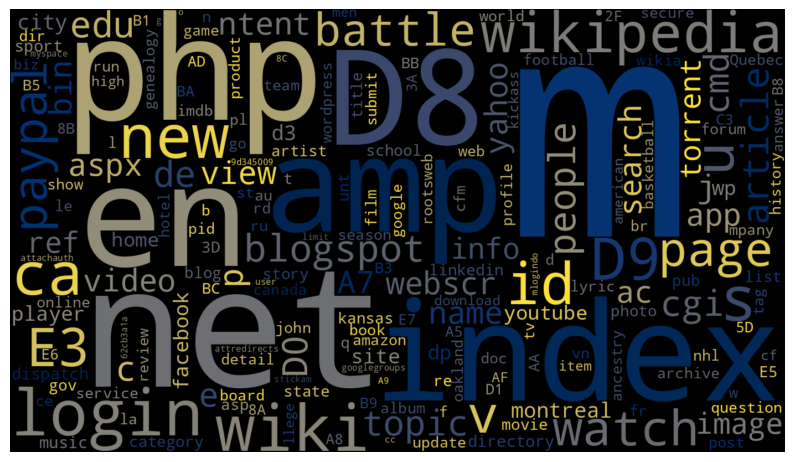

In [459]:
plt.figure(figsize = (10, 6), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.savefig('wordcloud_malware.png', format='png', dpi=150, bbox_inches='tight')
plt.axis('off')
plt.show()

In [460]:
type(phishing_sites)

numpy.ndarray

In [461]:
phishing_sites_strings = str(phishing_sites)

In [462]:
type(phishing_sites_strings)

str

In [463]:
phishing_sites_strings = nltk.tokenize.sent_tokenize(phishing_sites_strings)

In [464]:
phishing_sites_strings = nltk.Text(phishing_sites_strings)

In [465]:
print(phishing_sites_strings[0:20])

["['br-icloud.com.br' 'mp3raid.com/music/krizz_kaliko.html'\n 'bopsecrets.org/rexroth/cr/1.htm' ...\n 'www.gamespot.com/xbox360/action/deadspace/'\n 'en.wikipedia.org/wiki/Dead_Space_(video_game)'\n 'www.angelfire.com/goth/devilmaycrytonite/']"]


In [466]:
print(phishing_sites_strings.collocations())


None


In [467]:
phishing_tokens = [nltk.tokenize.sent_tokenize(token) for token in phishing_sites]

In [468]:
phishing_tokens

[['br-icloud.com.br'],
 ['mp3raid.com/music/krizz_kaliko.html'],
 ['bopsecrets.org/rexroth/cr/1.htm'],
 ['http://www.garage-pirenne.be/index.php?option=com_content&view=article&id=70&vsig70_0=15'],
 ['http://adventure-nicaragua.net/index.php?option=com_mailto&tmpl=component&link=aHR0cDovL2FkdmVudHVyZS1uaWNhcmFndWEubmV0L2luZGV4LnBocD9vcHRpb249Y29tX2NvbnRlbnQmdmlldz1hcnRpY2xlJmlkPTQ3OmFib3V0JmNhdGlkPTM2OmRlbW8tYXJ0aWNsZXMmSXRlbWlkPTU0'],
 ['http://buzzfil.net/m/show-art/ils-etaient-loin-de-s-imaginer-que-le-hibou-allait-faire-ceci-quand-ils-filmaient-2.html'],
 ['espn.go.com/nba/player/_/id/3457/brandon-rush'],
 ['yourbittorrent.com/?q=anthony-hamilton-soulife'],
 ['http://www.pashminaonline.com/pure-pashminas'],
 ['allmusic.com/album/crazy-from-the-heat-r16990'],
 ['corporationwiki.com/Ohio/Columbus/frank-s-benson-P3333917.aspx'],
 ['http://www.ikenmijnkunst.nl/index.php/exposities/exposities-2006'],
 ['myspace.com/video/vid/30602581'],
 ['http://www.lebensmittel-ueberwachung.de/index.p

In [469]:
type(data)

pandas.core.frame.DataFrame

In [470]:
len(data)

651191

In [471]:
import re
#nltk.download('stopwords')
#from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer

sites = []

for i in range(0, len(data[:25000])):
  links = re.sub('[^a-zA-Z]', ' ', data['url'][i])
  links = links.lower()
  links = links.split()
  #ps = PorterStemmer()
  #links = [ps.stem(word) for word in links if not word in set(stopwords.words('english'))]
  links = ' '.join(links)
  sites.append(links)

In [472]:
print(sites[:100])

['br icloud com br', 'mp raid com music krizz kaliko html', 'bopsecrets org rexroth cr htm', 'http www garage pirenne be index php option com content view article id vsig', 'http adventure nicaragua net index php option com mailto tmpl component link ahr cdovl fkdmvudhvyzs uawnhcmfndweubmv l luzgv lnbocd vchrpb y tx nvbnrlbnqmdmlldz hcnrpy xljmlkptq omfib v jmnhdglkptm omrlbw tyxj awnszxmmsxrlbwlkptu', 'http buzzfil net m show art ils etaient loin de s imaginer que le hibou allait faire ceci quand ils filmaient html', 'espn go com nba player id brandon rush', 'yourbittorrent com q anthony hamilton soulife', 'http www pashminaonline com pure pashminas', 'allmusic com album crazy from the heat r', 'corporationwiki com ohio columbus frank s benson p aspx', 'http www ikenmijnkunst nl index php exposities exposities', 'myspace com video vid', 'http www lebensmittel ueberwachung de index php aktuelles', 'http www szabadmunkaero hu cimoldal html start', 'http larcadelcarnevale com catalogo pa

In [473]:
len(sites)

25000

In [474]:
print(data.type)

0           phishing
1             benign
2             benign
3         defacement
4         defacement
             ...    
651186      phishing
651187      phishing
651188      phishing
651189      phishing
651190      phishing
Name: type, Length: 651191, dtype: object


In [475]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(sites).toarray()
y = data.iloc[:25000, -1].values
testing_y = y

In [476]:
print(len(testing_y))

25000


In [477]:
for i in range(0, len(testing_y)):
  if testing_y[i] == 'phishing' or testing_y[i] == 'defacement' or testing_y[i] == 'malware':
    testing_y[i] = 1
  else:
    testing_y[i] = 0

In [478]:
print(testing_y)

[1 0 0 ... 1 0 0]


In [479]:
print(type(testing_y))

<class 'numpy.ndarray'>


In [480]:
len(testing_y)

25000

In [481]:
print(y)

[1 0 0 ... 1 0 0]


In [482]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [483]:
print(len(y))

25000


In [484]:
print(le.classes_)

[0 1]


In [485]:
print(len(y))

25000


In [486]:
print(y)

[1 0 0 ... 1 0 0]


In [487]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, testing_y, test_size=0.2, random_state=0)

In [488]:
type(y_train)

numpy.ndarray

In [489]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train.astype('int'))

GaussianNB()

In [490]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train.astype('int'))

DecisionTreeClassifier()

In [491]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = GaussianNB()
rf_classifier.fit(X_train, y_train.astype('int'))

GaussianNB()

In [492]:
y_pred = nb_classifier.predict(X_test)

In [493]:
y_pred_dt = dt_classifier.predict(X_test)
y_pred_rf = rf_classifier.predict(X_test)

In [496]:
y_test = y_test.astype('int')

In [497]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

cm_dt = confusion_matrix(y_test, y_pred_dt)
acc_dt = accuracy_score(y_test, y_pred_dt)

cm_rf = confusion_matrix(y_test, y_pred_rf)
acc_rf = accuracy_score(y_test, y_pred_rf)

In [498]:
print(cm)
print(cm_dt)
print(cm_rf)

[[3002  706]
 [  84 1208]]
[[3665   43]
 [ 157 1135]]
[[3002  706]
 [  84 1208]]


In [499]:
print(acc)
print(acc_dt)
print(acc_rf)

0.842
0.96
0.842


In [502]:
target_names = ['phishing', 'benign', 'defacement', 'malware']

# For Naive-Bayes
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      3708
           1       0.63      0.93      0.75      1292

    accuracy                           0.84      5000
   macro avg       0.80      0.87      0.82      5000
weighted avg       0.88      0.84      0.85      5000



In [504]:
# For Decision Trees
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3708
           1       0.96      0.88      0.92      1292

    accuracy                           0.96      5000
   macro avg       0.96      0.93      0.95      5000
weighted avg       0.96      0.96      0.96      5000



In [505]:
# For Random Forest
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      3708
           1       0.63      0.93      0.75      1292

    accuracy                           0.84      5000
   macro avg       0.80      0.87      0.82      5000
weighted avg       0.88      0.84      0.85      5000



In [506]:
import sklearn.metrics as metrics

probs_nb = nb_classifier.predict_proba(X_test)
preds_nb = probs_nb[:,1]
fpr_nb,tpr_nb,threshold = metrics.roc_curve(y_test, preds_nb, pos_label=1)
roc_auc_nb = metrics.auc(fpr_nb, tpr_nb)

In [507]:
probs_dt = dt_classifier.predict_proba(X_test)
preds_dt = probs_dt[:,1]
fpr_dt,tpr_dt,threshold = metrics.roc_curve(y_test, preds_dt, pos_label=1)
roc_auc_dt = metrics.auc(fpr_dt, tpr_dt)

In [508]:
probs_rf = rf_classifier.predict_proba(X_test)
preds_rf = probs_rf[:,1]
fpr_rf,tpr_rf,threshold = metrics.roc_curve(y_test, preds_rf, pos_label=1)
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)

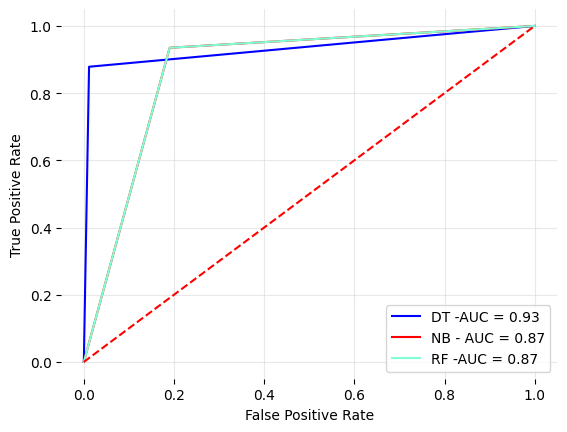

In [511]:
#plt.title('Stacked Ensemble Classifier vs other Classifiers')
plt.plot(fpr_dt, tpr_dt, 'blue', label = 'DT -AUC = %0.2f' % roc_auc_dt)
plt.plot(fpr_nb, tpr_nb, 'red', label = 'NB - AUC = %0.2f' % roc_auc_nb)
plt.plot(fpr_rf, tpr_rf, 'aquamarine', label = 'RF -AUC = %0.2f' % roc_auc_rf)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().set_facecolor("white")
plt.grid(color="lightgray", alpha=0.5, zorder=-1)
plt.savefig('Malware Models.png', dpi=150, bbox_inches='tight')

plt.show()